# 线性回归

## 【关键词】最小二乘法，线性

## 一、普通线性回归

### 1、原理

分类的目标变量是标称型数据，而回归将会对连续型的数据做出预测。

应当怎样从一大堆数据里求出回归方程呢？

假定输人数据存放在矩阵X中，而回归系数存放在向量W中。那么对于给定的数据X1, 预测结果将会通过

Y=X*W

给出。现在的问题是，手里有一些X和对应的Y,怎样才能找到W呢？

一个常用的方法就是找出使误差最小的W。这里的误差是指预测Y值和真实Y值之间的差值，使用该误差的简单累加将使得正差值和负差值相互抵消，所以我
们采用平方误差。

最小二乘法

平方误差可以写做:

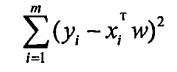

对W求导，当导数为零时，平方误差最小，此时W等于：

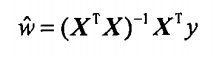

例如有下面一张图片：

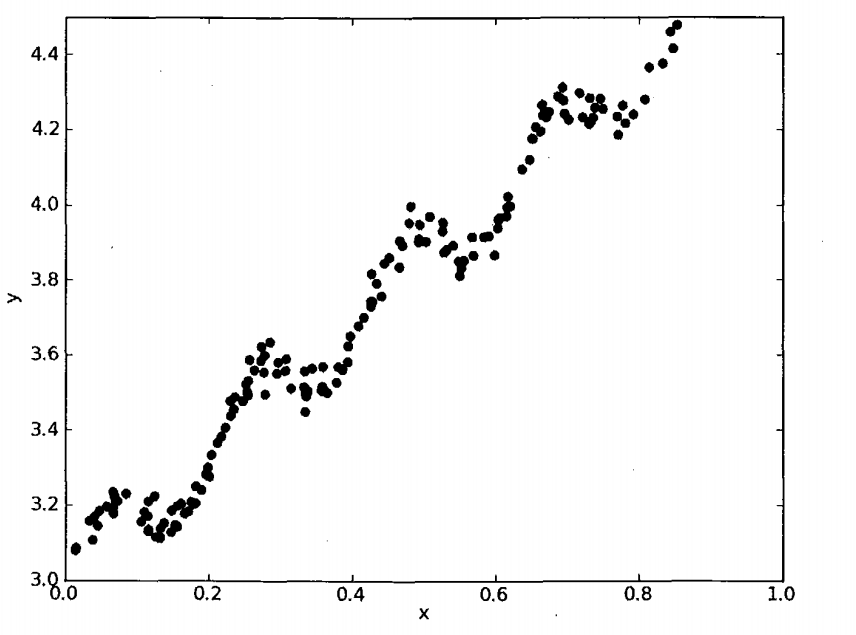

求回归曲线，得到：

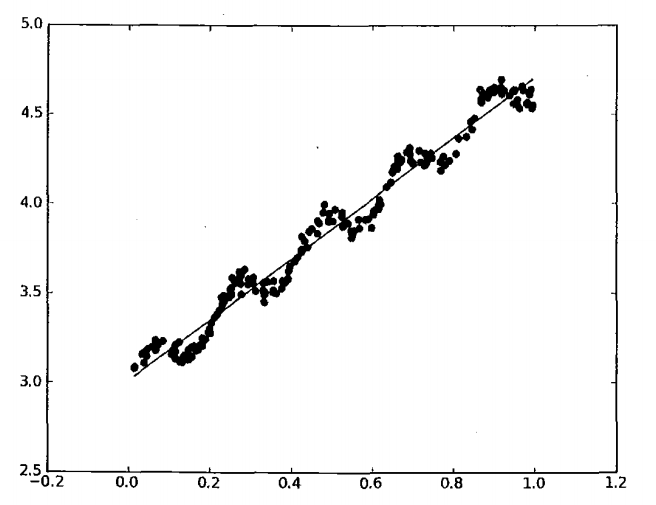

### 2、实例

导包

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

# 普通线性回归
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_diabetes

获取糖尿病数据

In [2]:
diabetes = load_diabetes()

In [12]:
data = diabetes.data
feature_names = diabetes.feature_names
target = diabetes.target
samples = DataFrame(data=data,columns=feature_names)
samples.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


抽取训练数据和预测数据

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# 研究bmi指标对血糖的影响趋势
samples = samples['bp']


In [15]:
train = samples.values.reshape(-1,1)
train

array([[ 2.18723550e-02],
       [-2.63278347e-02],
       [-5.67061055e-03],
       [-3.66564468e-02],
       [ 2.18723550e-02],
       [-1.94420933e-02],
       [-1.59992226e-02],
       [ 6.66296740e-02],
       [-4.00993175e-02],
       [-3.32135761e-02],
       [ 8.10087222e-03],
       [-3.32135761e-02],
       [-9.11348125e-03],
       [ 8.10087222e-03],
       [-1.25563519e-02],
       [ 8.04011568e-02],
       [ 4.94153205e-02],
       [ 5.63010619e-02],
       [-3.66564468e-02],
       [-4.00993175e-02],
       [-4.35421882e-02],
       [ 1.21513083e-03],
       [-9.11348125e-03],
       [ 3.10533436e-02],
       [-2.28849640e-02],
       [-4.00993175e-02],
       [-2.63278347e-02],
       [-4.00993175e-02],
       [-7.45280244e-02],
       [ 6.31868033e-02],
       [-1.94420933e-02],
       [-8.14137658e-02],
       [ 2.87580964e-02],
       [-2.22773986e-03],
       [-5.73136710e-02],
       [-4.92803060e-02],
       [ 5.28581912e-02],
       [-5.73136710e-02],
       [ 9.7

创建数学模型

In [16]:
linear = LinearRegression()

linear.fit(train,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
# 获取训练数据
xmin,xmax = train.min(),train.max()
X_test = np.linspace(xmin,xmax,100).reshape(-1,1)

y_ = linear.predict(X_test)

Text(0.5,1,'bp')

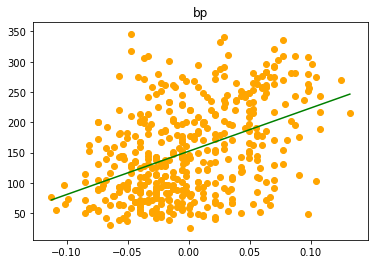

In [18]:
plt.plot(X_test,y_,color='green')
plt.scatter(train,target,color='orange')
plt.title('bp')

第一步：训练

第二步：预测

第三步：绘制图形

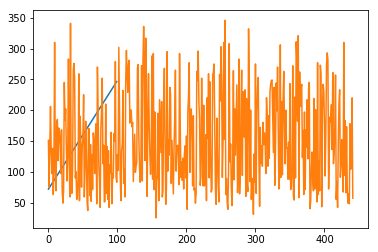

In [22]:
Series(y_).plot()
Series(target).plot()

In [23]:
# 获取所有的系数
linear.coef_

array([714.7416437])

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test,y_)

NameError: name 'y_test' is not defined

In [ ]:
import sklearn.datasets as datasets

boston = datasets.load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names
samples = DataFrame(data=data,columns=feature_names)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(samples,target,test_size=0.2,random_state=1)

linear = LinearRegression()
linear.fit(X_train,y_train)
y_ = linear.predict(X_test)

r2_score(y_test,y_)

In [ ]:
plt.plot(y_,label='Predict')
plt.plot(y_test,label='True')
plt.legend()

## 二、岭回归

In [ ]:
f(x) = w1*x1 + w2*x2 + w3*x3

1   2  4  7
2   5  3  2
3   6  1  9


# 有解方程
1 = a*2 + b*4 + c*7
2 = a*5 + b*3 + c*2
3 = a*6 + b*1 + c*9

# 无解方程
1 = a*2 + b*4 + c*7
2 = a*5 + b*3 + c*2


# 不满秩矩阵 不能求逆
# 数据样本的个数 < 数据特征的个数 需要使用岭回归
# 多重共线性
2  4  7        1 0 0      3  4  7
5  3  2   + λ*0 1 0  =   5  4  2  -> 可以求逆 -> 线性回归模型就可用了
               0 0 1      0  0  1
    

### 1、原理

缩减系数来“理解”数据

如果数据的特征比样本点还多应该怎么办？是否还可以使用线性回归和之前的方法来做预测？

答案是否定的，即不能再使用前面介绍的方法。这是因为输入数据的矩阵X不是满秩矩阵。非满秩矩阵在求逆时会出现问题。

为了解决这个问题，统计学家引入了岭回归（ridge regression)的概念

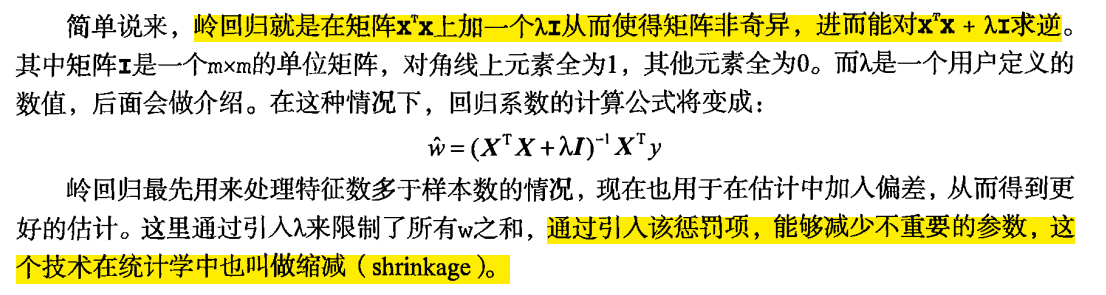

缩减方法可以去掉不重要的参数，因此能更好地理解数据。此外，与简单的线性回归相比，缩减法能取得更好的预测效果。

岭回归是加了二阶正则项的最小二乘，主要适用于过拟合严重或各变量之间存在多重共线性的时候，岭回归是有bias的，这里的bias是为了让variance更小。

#### 归纳总结

1.岭回归可以解决特征数量比样本量多的问题

2.岭回归作为一种缩减算法可以判断哪些特征重要或者不重要，有点类似于降维的效果

3.缩减算法可以看作是对一个模型增加偏差的同时减少方差

岭回归用于处理下面两类问题：

1.数据点少于变量个数

2.变量间存在共线性（最小二乘回归得到的系数不稳定，方差很大）

### 2、实例

岭回归一般用在样本值不够的时候

In [3]:
from sklearn.linear_model import Ridge

In [4]:
x = [[2,1,1],[1,2,3]]
y = [3,1]

使用普通线性回归

In [5]:
linear = LinearRegression()
linear.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

使用岭回归

In [6]:
# alpha就是λ
ridge = Ridge(alpha=0.01)
ridge.fit(x,y)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [7]:
linear.coef_

array([ 0.33333333, -0.33333333, -0.66666667])

In [8]:
# 岭回归可以缩减系数
ridge.coef_

array([ 0.33222591, -0.33222591, -0.66445183])

深入研究岭回归

- 理解岭回归缩减系数）

【备注】coef_函数可以获取机器学习模型中各个特征值的系数

拓展：岭回归

创建一个假象数据样本集

In [9]:
X = 1. / (np.arange(1, 11) + np.arange(0, 10).reshape(-1,1))

y = np.array([1,2,3,4,5,6,7,8,9,0])

In [10]:
# 研究λ对岭回归系数的影响
# 
alphas = np.logspace(-10, -2, 200)
alphas

array([1.00000000e-10, 1.09698580e-10, 1.20337784e-10, 1.32008840e-10,
       1.44811823e-10, 1.58856513e-10, 1.74263339e-10, 1.91164408e-10,
       2.09704640e-10, 2.30043012e-10, 2.52353917e-10, 2.76828663e-10,
       3.03677112e-10, 3.33129479e-10, 3.65438307e-10, 4.00880633e-10,
       4.39760361e-10, 4.82410870e-10, 5.29197874e-10, 5.80522552e-10,
       6.36824994e-10, 6.98587975e-10, 7.66341087e-10, 8.40665289e-10,
       9.22197882e-10, 1.01163798e-09, 1.10975250e-09, 1.21738273e-09,
       1.33545156e-09, 1.46497140e-09, 1.60705282e-09, 1.76291412e-09,
       1.93389175e-09, 2.12145178e-09, 2.32720248e-09, 2.55290807e-09,
       2.80050389e-09, 3.07211300e-09, 3.37006433e-09, 3.69691271e-09,
       4.05546074e-09, 4.44878283e-09, 4.88025158e-09, 5.35356668e-09,
       5.87278661e-09, 6.44236351e-09, 7.06718127e-09, 7.75259749e-09,
       8.50448934e-09, 9.32930403e-09, 1.02341140e-08, 1.12266777e-08,
       1.23155060e-08, 1.35099352e-08, 1.48202071e-08, 1.62575567e-08,
      

In [11]:
ridge = Ridge()

coefs = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    # 使用不同的λ系数的岭回归模型，训练相同的一组数据集
    ridge.fit(X,y)
    # 每训练一次，都会得到一组系数
    coefs.append(ridge.coef_)

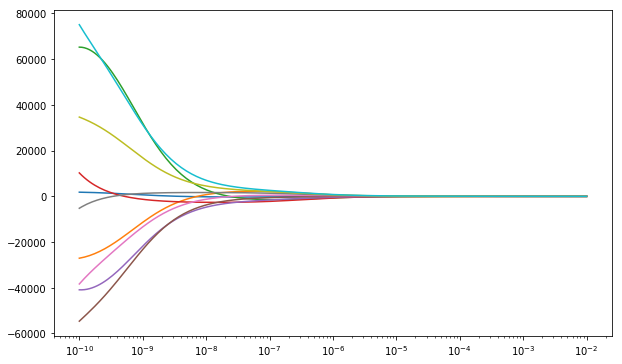

In [12]:
# 绘图展示λ和coef之间的关系
plt.figure(figsize=(10,6))
data = plt.plot(alphas,coefs)
plt.xscale('log')

创建一个alpha集合，用以验证种不同alpha值对预测系数的结果的影响

创建岭回归机器学习算法对象

使用不同的alpha进行数据训练，保存所有训练结果的coef_

绘图查看alpha参数和coefs的关系

## 三、lasso回归

### 1、原理

【拉格朗日乘数法】

对于参数w增加一个限定条件，能到达和岭回归一样的效果：

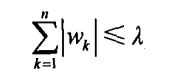

在lambda足够小的时候，一些系数会因此被迫缩减到0

### 2、实例

In [13]:
boston = datasets.load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names
samples = DataFrame(data=data,columns=feature_names)

X_train,X_test,y_train,y_test = train_test_split(samples,target,test_size=0.2,random_state=1)

NameError: name 'datasets' is not defined

In [14]:
from sklearn.linear_model import Lasso
ridge = Ridge(alpha=0.8)
lasso = Lasso(alpha=0.0006)

ridge.fit(X_train,y_train)
lasso.fit(X_train,y_train)

y1_ = ridge.predict(X_test)
y2_ = lasso.predict(X_test)

print('ridge r2_score is %f'% r2_score(y_test,y1_))
print('lasso r2_score is %f'% r2_score(y_test,y2_))

NameError: name 'X_train' is not defined

In [15]:
ridge.coef_

AttributeError: 'Ridge' object has no attribute 'coef_'

In [168]:
lasso.coef_

array([-1.11200981e-01,  5.80377927e-02,  1.78595557e-02,  2.12213214e+00,
       -1.94134564e+01,  3.08852219e+00,  4.40377433e-03, -1.49711536e+00,
        3.04419685e-01, -1.11358504e-02, -9.87853509e-01,  7.43569257e-03,
       -5.45952385e-01])

In [170]:
linear = LinearRegression()
linear.fit(X_train,y_train)
y_ = linear.predict(X_test)
r2_score(y_test,y_)

0.7634809220792323

## 四、普通线性回归、岭回归与lasso回归比较

导包，导入sklearn.metrics.r2_score用于给模型打分

使用numpy创建数据X，创建系数，对系数进行处理，对部分系数进行归零化操作，然后根据系数进行矩阵操作求得目标值  
增加噪声

训练数据和测试数据

分别使用线性回归，岭回归，Lasso回归进行数据预测

数据视图，此处获取各个算法的训练数据的coef_:系数

## 五、练习

### 1、使用多种方法对boston数据集进行回归，画出回归图像，并比较多种回归方法的效果

`
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target
`

### 2、预测鲍鱼的年龄

abalone.txt